# Reverse MNIST

## Preliminaries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda:0") # Uncomment this to run on GPU
import NeuralNetwork as NN
import Layer
import importlib
import time
from copy import deepcopy
from IPython.display import display
from ipywidgets import FloatProgress

import mnist_loader
importlib.reload(mnist_loader)
importlib.reload(NN)
importlib.reload(Layer);

## Load MNIST DATA

In [ ]:
train, validate, test = mnist_loader.load_data_wrapper('../../python/mnist.pkl')
train = [torch.tensor(trai#howmany = 2000 #1000 #50
#train, validate, test = mnist_loader.load_data_wrapper()
#train = [torch.tensor(train[0][:howmany]).float().to(device), torch.tensor(train[1][:howmany]).float().to(device)]
#test = [torch.tensor(test[0][:howmany]).float().to(device), torch.tensor(test[1][:howmany]).float().to(device)]n[0]).float().to(device), torch.tensor(train[1]).float().to(device)]
test = [torch.tensor(test[0]).float().to(device), torch.tensor(test[1]).float().to(device)]

In [5]:
howmany = 2000 #1000 #50
train, validate, test = mnist_loader.load_data_wrapper('../../python/mnist.pkl')
train = [torch.tensor(train[0][:howmany]).float().to(device), torch.tensor(train[1][:howmany]).float().to(device)]
test = [torch.tensor(test[0][:howmany]).float().to(device), torch.tensor(test[1][:howmany]).float().to(device)]

### Transform input a la Whittington & Bogcz

In [3]:
def inv_logistic_raw(y):
    z = torch.log( y / (1.0 - y) )
    z[z>5.] = 5
    z[z<-5.] = -5.
    return z

def inv_logistic(dataset):
    for idx in range(len(dataset)):
        y = inv_logistic_raw(dataset[idx])
        dataset[idx] = y

In [4]:
# Transform the input a la Whittington & Bogacz
train[1] = train[1]*0.94 + 0.03
test[1] = test[1]*0.94 + 0.03

In [5]:
inv_logistic(train[0])
inv_logistic(test[0])

# MNIST Experiment

In [6]:
#Set the weight decay for the connections at each layer

# Deep Reversed
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=10))
net.AddLayer(Layer.PELayer(n=600))
net.AddLayer(Layer.PELayer(n=600))
net.AddLayer(Layer.TopPELayer(n=784))
net.Connect(0, 1, act='logistic')
net.Connect(1, 2, act='logistic')
net.Connect(2, 3, act='logistic')
net.SetTau(0.08)

net.layers[0].SetVariance(100.0)
net.layers[1].SetVariance(20.0)
net.layers[2].SetVariance(3.0)

for c in net.connections:
    c.SetDecay(W_decay=0.0, M_decay=0.0)

logistic
logistic
logistic


In [10]:
net.Save('net_weights_initialized.npy')

In [7]:
net.l_rate = 0.001
net.FastLearn(train[1], train[0], test=test, T=40, epochs=1, Beta_one=0.9, Beta_two=0.999, ep=0.00000001, noise=False, freeze=99, batch_size=20)

0.1095


FloatProgress(value=0.0)

0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.1095
0.109
0.1495
0.1095
0.1095
0.1675
0.1425
0.146
0.1215
0.117
0.117
0.117
0.1235
0.165
0.119
0.1205
0.117
0.117
0.117
0.117
0.1175
0.095
0.103
0.097
0.123
0.097
0.097
0.097
0.097
0.097
0.097
0.097
0.097
0.0595
0.117
0.0625
0.1305
0.0535
0.1025
0.1025
0.1025
0.1025
0.1025
0.1025
0.1025
0.1025
0.0455
0.094
0.06
0.0965
0.091
0.088
0.071
0.103
0.117
0.117
0.1015
0.087
0.1025
0.1085
0.1085
0.1085
0.1085
0.1085
0.1085
0.108
0.1085
0.114
0.1085
0.1095
0.109
0.1095
0.1095
0.1095
0.091
0.128
0.0995
0.101
0.0735
0.163
0.11


In [8]:
print(net.test_error_history)
print(net.train_error_history)
#for c in net.connections:
#    print(c.W.transpose(1,0) - c.M)

AttributeError: 'NeuralNetwork' object has no attribute 'test_error_history'

In [13]:
net_start = NN.NeuralNetwork()
net_start.Load('net_weights_initialized.npy')

In [14]:
#Calculate average difference between starting and trained matrices

meansq_divergence_start = []
meansq_divergence_end = []

for k in range (0, len(net.connections)):
    sq_diff_start = np.square(net_start.connections[k].W.transpose(1,0) - net_start.connections[k].M)
    meansq_diff_start = 0.0
    
    for i in range (0, sq_diff_start.shape[0]):
        for j in range (0, sq_diff_start.shape[1]):
            meansq_diff_start += sq_diff_start[i][j]
    
    num_elements = sq_diff_start.shape[0] * sq_diff_start.shape[1]
    meansq_divergence_start.append(meansq_diff_start/num_elements)
    
    
    sq_diff_end = np.square(net.connections[k].W.transpose(1,0) - net.connections[k].M)
    meansq_diff_end = 0.0
    
    
    for i in range (0, sq_diff_end.shape[0]):
        for j in range (0, sq_diff_end.shape[1]):
            meansq_diff_end += sq_diff_end[i][j]
            
    meansq_divergence_end.append(meansq_diff_end/num_elements) 

In [15]:
for k in range (0, len(net.connections)):
    print('Connection {k} Initial Mean Squared Differece: {meansq_divergence_start}'.format(k=k, meansq_divergence_start=meansq_divergence_start[k]))
    print('Connection {k} Trained Mean Squared Difference: {meansq_divergence_start}'.format(k=k, meansq_divergence_start=meansq_divergence_end[k]))

Connection 0 Initial Mean Squared Differece: 0.20138445496559143
Connection 0 Trained Mean Squared Difference: 0.20138444006443024
Connection 1 Initial Mean Squared Differece: 0.0033234180882573128
Connection 1 Trained Mean Squared Difference: 0.0033234201837331057
Connection 2 Initial Mean Squared Differece: 0.003330925712361932
Connection 2 Trained Mean Squared Difference: 0.0033309287391602993


Digit tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], device='cuda:0') correctly classified as 8
Digit tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], device='cuda:0') correctly classified as 7
Digit tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], device='cuda:0') correctly classified as 4
Digit tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], device='cuda:0') correctly classified as 3
Digit tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0') correctly classified as 1
Digit tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], device='cuda:0') correctly classified as 3
Digit tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0') correctly classified as 0
Digit tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], device='cuda:0') correctly classified as 6
Digit tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0') correctly classified as 2
Digit tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], device='cuda:0') correctly classified as 8


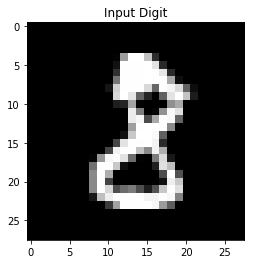

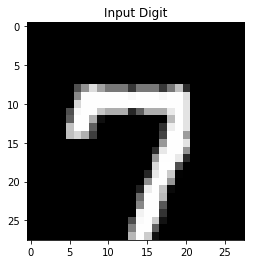

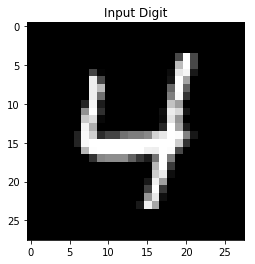

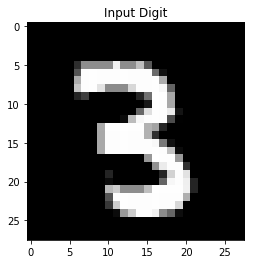

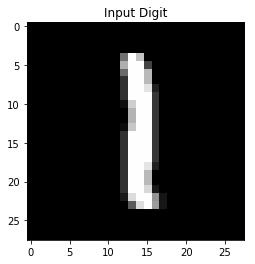

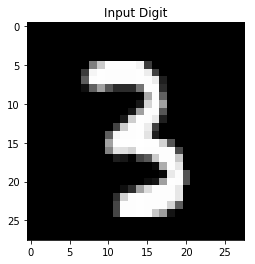

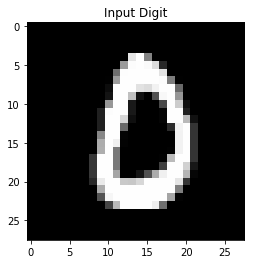

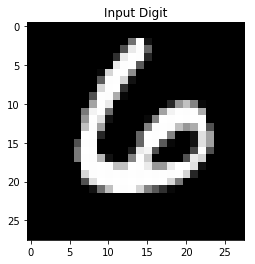

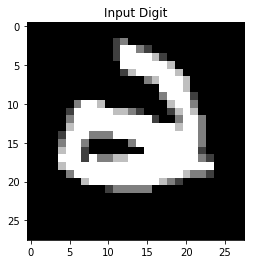

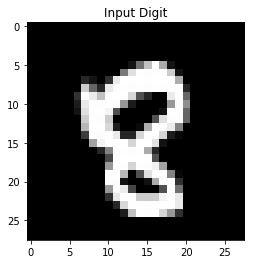

In [9]:
#print some sample images and their classifications
for i in range (0, 10):
    x = test[0][4*i + 6359]
    y = test[1][4*i + 6359]
    
    digit = np.reshape(NN.logistic(x), ((28, 28)))
    plt.figure()
    plt.title('Input Digit')
    plt.imshow(digit, cmap='gray')
    
    t_class = (y - 0.03) / 0.94
    
    net.BackprojectExpectation(x)
    z = net.connections[0].sigma(net.layers[1].v)@net.connections[0].M + net.layers[0].b
    if np.argmax(t_class) == np.argmax(z):
        print('Digit {t_class} correctly classified as {y_class}'.format(t_class=t_class, y_class=np.argmax(z)))
    else:
        print('Digit {t_class} incorrectly classified as {y_class}'.format(t_class=t_class, y_class=np.argmax(z)))
    

In [58]:
def Adversarial_Gradient_Ascent(net, image_to_perturb, actual_class, activation_and_loss):
    net.BackprojectExpectation(image_to_perturb)    
    y = net.connections[0].sigma(net.layers[1].v)@net.connections[0].M + net.layers[0].b

    diEdiz = 0
    
    if activation_and_loss == 'logistic_CE':
        diEdiz = y - actual_class
    else:
        #Add other activation / loss combos here
        diEdiz = y - actual_class
    
    for i in range(1, len(net.connections)):
        dvdz = 0
        if net.connections[i-1].activation_function == 'logistic':
            #calculate logistic derivative of node v at layer i with respect to input current 'z'
            dvdz = NN.logistic(net.layers[i].v) * (1-NN.logistic(net.layers[i].v))
        else:
            #add other activation functions here
            dvdz = NN.logistic(net.layers[i].v) * (1-NN.logistic(net.layers[i].v))

        diEdiz = diEdiz @ net.connections[i-1].M.transpose(1,0) * dvdz

    #calculate the amount to perturb the image
    diEdix = diEdiz @ net.connections[-1].M.transpose(1,0)    
    return diEdix

digit 0 classified as 0 with confidence 0.7495336532592773
digit 1 classified as 1 with confidence 1.0497674942016602
digit 2 classified as 2 with confidence 0.8626950979232788
digit 3 classified as 3 with confidence 1.066166877746582
digit 4 classified as 4 with confidence 0.9720274209976196
digit 5 classified as 5 with confidence 1.0052205324172974
digit 6 classified as 6 with confidence 0.9314154386520386
digit 7 classified as 7 with confidence 0.9537693858146667
digit 8 classified as 8 with confidence 1.0378481149673462
digit 9 classified as 9 with confidence 0.809021532535553


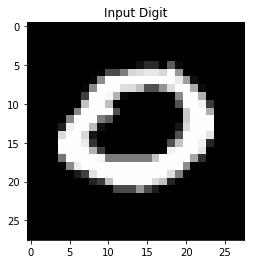

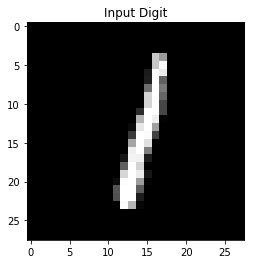

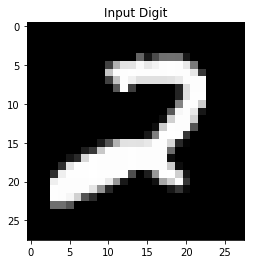

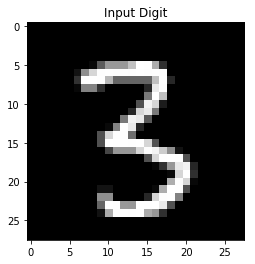

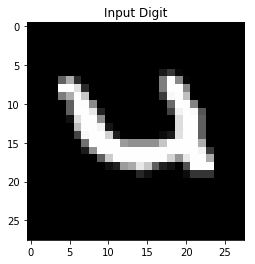

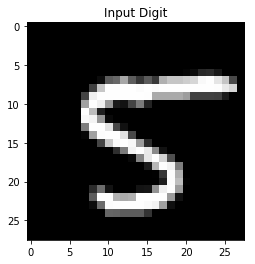

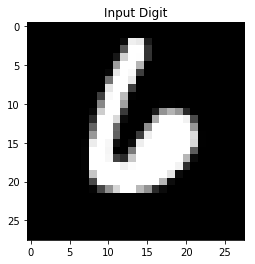

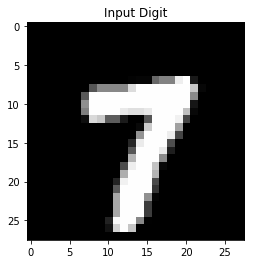

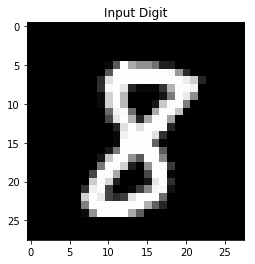

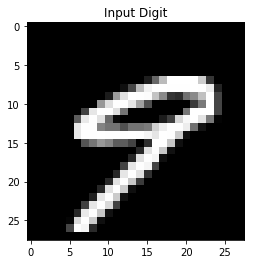

In [59]:
import copy
import random

#Extract 10 digits from MNIST classified correctly by the network

x_image = []
x_class = []
for i in range(0, 10):
    while True:
        j = random.randint(0, 10000)
        if np.argmax(test[1][j]) == i:
            
            net.BackprojectExpectation(test[0][j])
            y = net.connections[0].sigma(net.layers[1].v)@net.connections[0].M + net.layers[0].b
            
            if np.argmax(y) == i:
                x_image.append(test[0][j])
                x_class.append(test[1][j])
                break

for i in range(0, len(x_image)):
    digit = np.reshape(NN.logistic(x_image[i]), ((28, 28)))
    plt.figure()
    plt.title('Input Digit')
    plt.imshow(digit, cmap='gray')
    
    net.BackprojectExpectation(x_image[i])
    y = net.connections[0].sigma(net.layers[1].v)@net.connections[0].M + net.layers[0].b
    
    prediction = np.argmax(y)
    actual = np.argmax(x_class[i])
    
    print('digit {t_class} classified as {y_class} with confidence {conf}'.format(t_class=actual, y_class=np.argmax(y), conf=y[prediction]))

In [60]:
#Generate some adversarial digits
num_of_adversarials = 10
j = 0

while j < num_of_adversarials:
    #Loop over the digits 0-9 the network correctly classifies, creating an adversarial version of each
    for i in range(0, 10):
        it = 0
        it_lim = 100000 #STOP perturbing after this many iterations of Adversarial_Gradient_Ascent
        
        x = x_image[i]
        while it < it_lim:
            #Get a perturbation vector
            perturbation = Adversarial_Gradient_Ascent(net, x_image[i], x_class[i], 'logistic_CE')
            
            #Purrrrrturb the image....meow
            x += 0.1*torch.sign(perturbation)
            
            #Check the network's prediction of purrturbed image's class
            net.BackprojectExpectation(x)
            predict = net.connections[0].sigma(net.layers[1].v)@net.connections[0].M + net.layers[0].b
            predicted_class = np.argmax(predict)
            
            if predicted_class != i:
                print('{actual} classified as {y_class} with confidence {conf} in {it} iterations'.format(actual=i, y_class=predicted_class, conf=predict[predicted_class], it=it))
                break
            elif it > it_lim:
                print('Could not force the digit {i} to be adversarially perturbed within {it_lim} iterations'.format(i=i, it_lim=it_lim))
                break
            it += 1

        np.save('adversarial_digit_{p}'.format(p=str(j+i)), x)
    j += 10

0 classified as 9 with confidence 0.5834716558456421
1 classified as 7 with confidence 0.8458508253097534
2 classified as 0 with confidence 0.6187591552734375
3 classified as 8 with confidence 0.6892573237419128
4 classified as 7 with confidence 0.5507076978683472
5 classified as 8 with confidence 0.719089686870575
6 classified as 0 with confidence 0.4761577546596527
7 classified as 5 with confidence 0.809154212474823
8 classified as 3 with confidence 0.6531239748001099
9 classified as 7 with confidence 0.4621829390525818


classified as 9 with confidence 0.5834716558456421
classified as 7 with confidence 0.8458508253097534
classified as 0 with confidence 0.6187591552734375
classified as 8 with confidence 0.6892573237419128
classified as 7 with confidence 0.5507076978683472
classified as 8 with confidence 0.719089686870575
classified as 0 with confidence 0.4761577546596527
classified as 5 with confidence 0.809154212474823
classified as 3 with confidence 0.6531239748001099
classified as 7 with confidence 0.4621829390525818


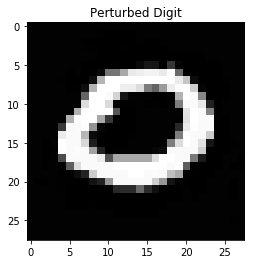

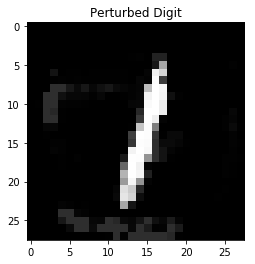

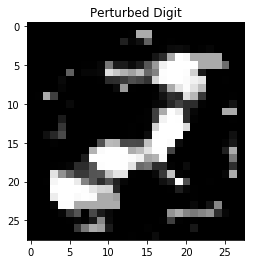

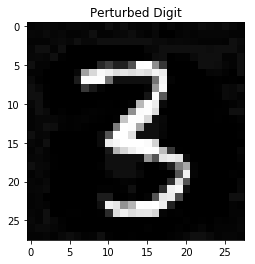

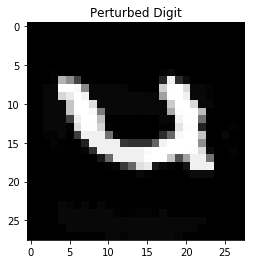

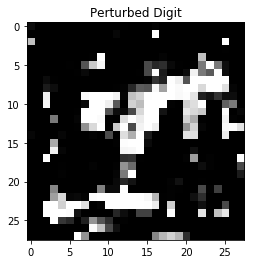

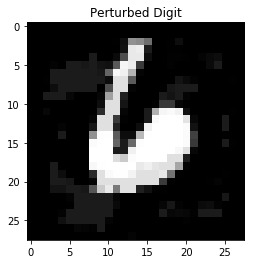

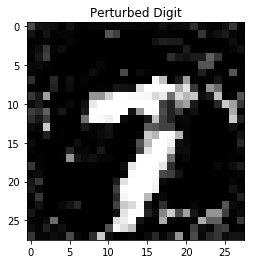

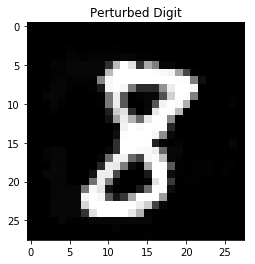

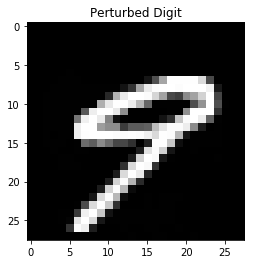

In [61]:
#Show the adversarial digits
for j in range (0, num_of_adversarials):
    x = np.load('adversarial_digit_{j}.npy'.format(j=j))
    
    digit = np.reshape(NN.logistic(torch.Tensor(x)), ((28, 28)))
    plt.figure()
    plt.title('Perturbed Digit')
    plt.imshow(digit, cmap='gray')
    
    #Check the network's classification of this image (again)
    net.BackprojectExpectation(x)
    predict = net.connections[0].sigma(net.layers[1].v)@net.connections[0].M + net.layers[0].b
    predicted_class = np.argmax(predict)

    print('classified as {y_class} with confidence {conf}'.format(y_class=predicted_class, conf=predict[predicted_class]))




In [ ]:
start_time = time.time()
net.learning_blackout = 0.5
net.learning_tau = 10.
net.Learn(train[1], train[0], T=1.5, dt=0.005, epochs=3, batch_size=5)
end_time = time.time()
print('Total time: '+str(end_time-start_time))

In [ ]:
net.layers[1].Probe(True)
net.layers[2].Probe(True)

In [ ]:
p=269
net.Reset()
net.SetTau(0.08)
net.BackprojectExpectation(train[0][p])
net.PropagateErrors(train[1][p])
#net.ResetErrors()
net.Infer(2., train[1][p], train[0][p], dt=0.005, learning=False)

plt.plot(net.t_history, np.array(net.layers[1].e_history)[:,:20]);

In [223]:
net.Reset()
net.BackprojectExpectation(train[0][p])
net.PropagateErrors(train[1][p])
net.layers[0].v

AttributeError: 'NeuralNetwork' object has no attribute 'PropagateErrors'

In [1582]:
print(train[1][p])
net.layers[1].sigma(net.layers[1].v)@net.connections[0].M + net.layers[0].b

tensor([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


tensor([ 0.0113,  0.8542,  0.0611,  0.0134, -0.2075, -0.1207,  0.0251,
         0.0144,  0.2252,  0.1794], device='cuda:0')

In [1583]:
net.layers[0].e

tensor([-0.0113,  0.1458, -0.0611, -0.0134,  0.2075,  0.1207, -0.0251,
        -0.0144, -0.2252, -0.1794], device='cuda:0')

tensor([ 0.1164, -0.1971,  0.1304, -0.1676,  0.1627, -0.0884,  1.0661,
        -0.0049,  0.2469,  0.0334], device='cuda:0')


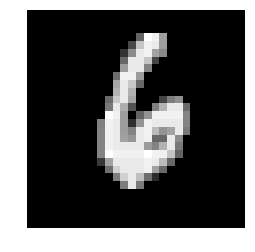

In [224]:
p = 147 #147 or 35   for 2s
#p = 1 #133 or 141   for 7s
plt.imshow(np.reshape(train[0][p],[28,28]), cmap='gray'); plt.axis('off');
net.BackprojectExpectation(train[0][p])
#net.Reset()
zFF = net.connections[1].sigma(net.layers[1].v)@net.connections[0].M + net.layers[0].b
#z = net.Generate(10., train[0][p])
#print(z)
print(zFF)

In [1003]:
torch.mean(net.connections[0].M)

tensor(1.00000e-03 *
       -1.2365, device='cuda:0')

In [1005]:
[torch.mean(l.b) for l in net.layers]

[tensor(1.00000e-03 *
        8.0076, device='cuda:0'), tensor(1.00000e-03 *
        -8.5817, device='cuda:0'), tensor(1.00000e-03 *
        -1.1793, device='cuda:0'), tensor(0., device='cuda:0')]

In [1007]:
[torch.mean(l.e) for l in net.layers]

[tensor(0., device='cuda:0'),
 tensor(0., device='cuda:0'),
 tensor(0., device='cuda:0'),
 tensor(0., device='cuda:0')]

In [948]:
# Train in reverse direction: one-hot -> reconstructed image
epochs = 5
T = 2.
dt = 0.01
start_time = time.time()
batch_size = 10
net.learning_tau = 30. #torch.tensor(batch_size).float().to(device) * 10.
fp = FloatProgress(min=0,max=epochs*len(train[0]))  
display(fp)
for k in range(epochs):
    batches = NN.MakeBatches(train[0], train[1], batch_size=batch_size)
    for x in batches:
        #net.Reset()
        net.BackprojectExpectation(x[0])
        net.Infer(T, x[1], x[0], dt=dt, learning=True)
        fp.value += batch_size
end_time = time.time()
print('Total time: '+str(end_time-start_time))

Allocating
Total time: 103.47046732902527


## Probe the Model

In [1449]:
z = net.Predict(10., train[1][0], dt=0.01)

## Save the Model

In [1604]:
net.Save('MNIST reversed deep v4.npy')

## Load the Model

In [1282]:
net = NN.NeuralNetwork()
net.Load('MNIST reversed deep v2.npy')

## Test the Network

tensor([-0.1991, -0.1662,  0.1106,  0.2979, -0.1943,  0.5603, -0.0035,
         0.2211, -0.5123,  0.6981], device='cuda:0')


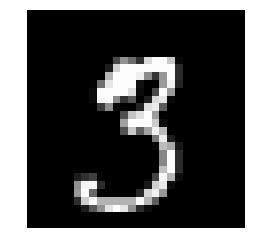

In [1358]:
p = 25 #147 or 35   for 2s
p = 9289 #133 or 141   for 7s
plt.imshow(np.reshape(train[0][p],[28,28]), cmap='gray'); plt.axis('off');
net.BackprojectExpectation(train[0][p])
#net.Reset()
zFF = net.layers[1].sigma(net.layers[1].v)@net.connections[0].M + net.layers[0].b
#z = net.Generate(10., train[0][p])
print(zFF)
#print(z)

In [574]:
net.Infer(4., test[1][p], test[0][p], dt=0.1, learning=True)
net.learn

True

In [801]:
net.layers[0].b

tensor([-0.0499,  0.0558,  0.0397,  0.1287,  0.0520, -0.0407,  0.0415,
        -0.0640,  0.0218,  0.0696], device='cuda:0')

In [802]:
net.SetTau(0.08)
net.layers[1].Probe(True)
net.layers[2].Probe(True)
#net.BackprojectExpectation(test[0][0])
#net.Reset()
net.Generate(4., test[0][0])
print(net.layers[0].v)
print(net.layers[1].v[:8])

Allocating
tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')
tensor([ 0.3598,  1.9552, -1.3044,  0.0423, -0.4499,  2.0527, -0.8055,
         1.0942], device='cuda:0')


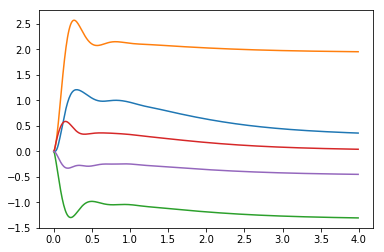

In [803]:
plt.plot(net.t_history, np.array(net.layers[1].v_history)[:,:5]);

In [804]:
net.Generate(4., test[0][1])
#net.BackprojectExpectation(test[0][1])
print(net.layers[0].v)
print(net.layers[1].v[:8])

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')
tensor([ 0.8965,  2.0493, -1.0175,  0.3032, -0.1225,  1.9652, -1.0904,
         0.3211], device='cuda:0')


tensor([ 0.0336,  0.2226,  0.1024,  0.1838, -0.0186,  0.0559,  0.1848,
        -0.0162,  0.1074,  0.1753], device='cuda:0')


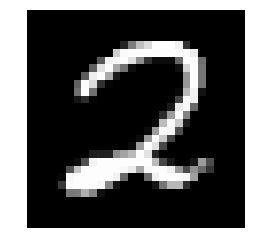

In [805]:
p = 35 #147 or 35   for 2s
#p = 133 #133 or 141   for 7s
plt.imshow(np.reshape(test[0][p],[28,28]), cmap='gray'); plt.axis('off');
net.BackprojectExpectation(test[0][p])
#net.Reset()
z = net.Generate(4., test[0][p])
print(z)

tensor([-0.0715, -0.1935,  0.1338,  0.0090, -0.1305,  0.2234,  0.2380,
        -0.1974, -0.0697,  1.0499], device='cuda:0')


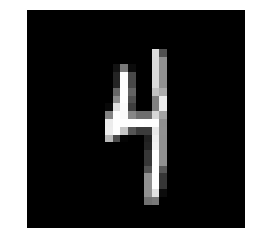

In [891]:
p = 65 #147 or 35   for 2s
#p = 141 #133 or 141   for 7s
plt.imshow(np.reshape(test[0][p],[28,28]), cmap='gray'); plt.axis('off');
#net.BackprojectExpectation(test[0][p])
net.Reset()
net.SetTau(0.08)
z = net.Generate(4., test[0][p])
print(z)

### Reconstructing a Digit

In [1636]:
p = 93
net.BackprojectExpectation(train[0][p])
print(y)

tensor([-0.0444,  0.1471, -0.1915,  0.4718, -0.2804,  0.3630,  0.1089,
         0.0928,  0.1115,  0.1510], device='cuda:0')


In [1637]:
net.SetBidirectional()

In [1624]:
net.SetBidirectional()
net.Infer(4., train[1][p], train[0][p])

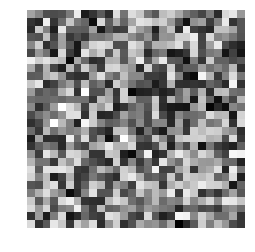

In [1638]:
#net.Reset()
#net.layers[-2].SetFixed()
net.layers[-1].v.zero_()
z = net.Predict(5., train[1][p])
plt.imshow(np.reshape(z,[28, 28]), cmap='gray'); plt.axis('off');

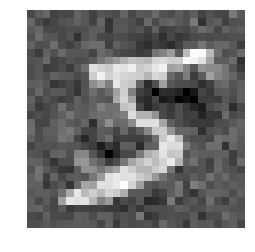

In [1597]:
#net.Reset()
net.SetBidirectional()
z = net.Predict(4., train[1][0])
plt.imshow(np.reshape(z,[28, 28]), cmap='gray'); plt.axis('off');

In [1478]:
net.layers[2].beta

tensor(1., device='cuda:0')

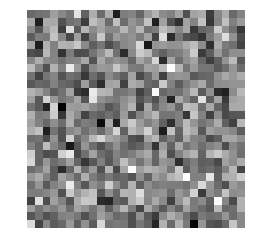

In [1453]:
#net.Reset()
z = net.layers[-1].e
plt.imshow(np.reshape(z,[28, 28]), cmap='gray'); plt.axis('off');

In [747]:
net.connections[-1].W

tensor([[-7.8700e+00, -7.5592e+00, -7.9245e+00,  ..., -7.8728e+00,
         -7.8759e+00, -7.5584e+00],
        [-7.6409e+01, -7.6099e+01, -7.6255e+01,  ..., -7.6007e+01,
         -7.6306e+01, -7.6060e+01],
        [-3.6636e+01, -3.6518e+01, -3.6407e+01,  ..., -3.6282e+01,
         -3.6350e+01, -3.6430e+01],
        ...,
        [-5.9620e+01, -5.9497e+01, -5.9523e+01,  ..., -5.9550e+01,
         -5.9734e+01, -5.9477e+01],
        [ 5.7501e+01,  5.7906e+01,  5.8006e+01,  ...,  5.8055e+01,
          5.7666e+01,  5.7868e+01],
        [ 1.8698e+01,  1.8819e+01,  1.8858e+01,  ...,  1.8783e+01,
          1.8691e+01,  1.8908e+01]], device='cuda:0')